In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
#feature scaling
from sklearn.preprocessing import MinMaxScaler
#feature selection
from sklearn.feature_selection import RFE
#Linearregression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#VIFcalculation
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Hide warnings
import warnings
warnings.filterwarnings('ignore')
#Show all columns
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)

In [2]:
#Importing dataset
cardf=pd.read_csv("CarPrice_dataset.csv")
cardf.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cardf.shape

(205, 26)

In [4]:
#inspect the type of variables
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
#statistics for numerical columns
cardf.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data Cleaning and Data Preparation

In [6]:
#No null values present in data
cardf.isnull().mean()

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

- We can see string/object data in different cases for object columns
- So will make all object type column values in smaller font

In [7]:
#make all string values in small case
cardf=cardf.applymap(lambda s:s.lower() if type(s) == str else s)
cardf.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Deriving new columns
- we will etract companyName from car-name 
- we will create range Type based on price of cars 

In [8]:
cardf["company"] = cardf['CarName'].apply(lambda x: x.split(" ")[0])

In [9]:
#we will check values and their count in our new column company : as it as categorical type
cardf["company"].value_counts()

toyota         31
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
maxda           2
renault         2
vw              2
vokswagen       1
porcshce        1
mercury         1
toyouta         1
Name: company, dtype: int64

In [10]:
#as we can see some spelling mistakes in company names.We will correct it.
cardf['company'].replace(to_replace=['toyouta'], value='toyota',inplace=True)
cardf['company'].replace(to_replace=['vokswagen', 'vw'], value='volkswagen',inplace=True)
cardf['company'].replace(to_replace=['maxda'], value='mazda',inplace=True)
cardf['company'].replace(to_replace=['porcshce'], value='porsche',inplace=True)

In [11]:
#creating price range  categorical column from price

#min price in dataset is: 5118 and max is :45400
def createPriceRanges(val):
    if val<10000:
        return 'low'
    elif val>=10000 and val <20000 :
        return 'medium'
    elif val>=20000 and val <30000 :
        return 'high'
    else:
        return 'veryhigh'

cardf["price_range"]=cardf["price"].apply(lambda x : createPriceRanges(x))

In [12]:
#create new column Volume of car based on carheigh,carlength and carwidth
cardf["volume"]=cardf.carheight*cardf.carlength*cardf.carwidth

- As we have derived new column company from car name we will use the same for further analysis.
- So we will drop this column.
- Also car_id is just and unique index column so we will remove that column also.

In [13]:
cardf.drop(["car_ID","CarName"],inplace= True,axis=1)

- From data  dictionary we know symboling is an categorical value so we will convert it into categorical type as it is in numerical

In [14]:
cardf["symboling"]= cardf["symboling"].astype("object")

# Data Visualization using EDA

- we will look for relationship between our  dependant variable "price" and other  independant variables

In [15]:
#numerical variable list
numericalcol=cardf.select_dtypes(include=np.number).columns.tolist()
numCol_df=cardf[numericalcol]

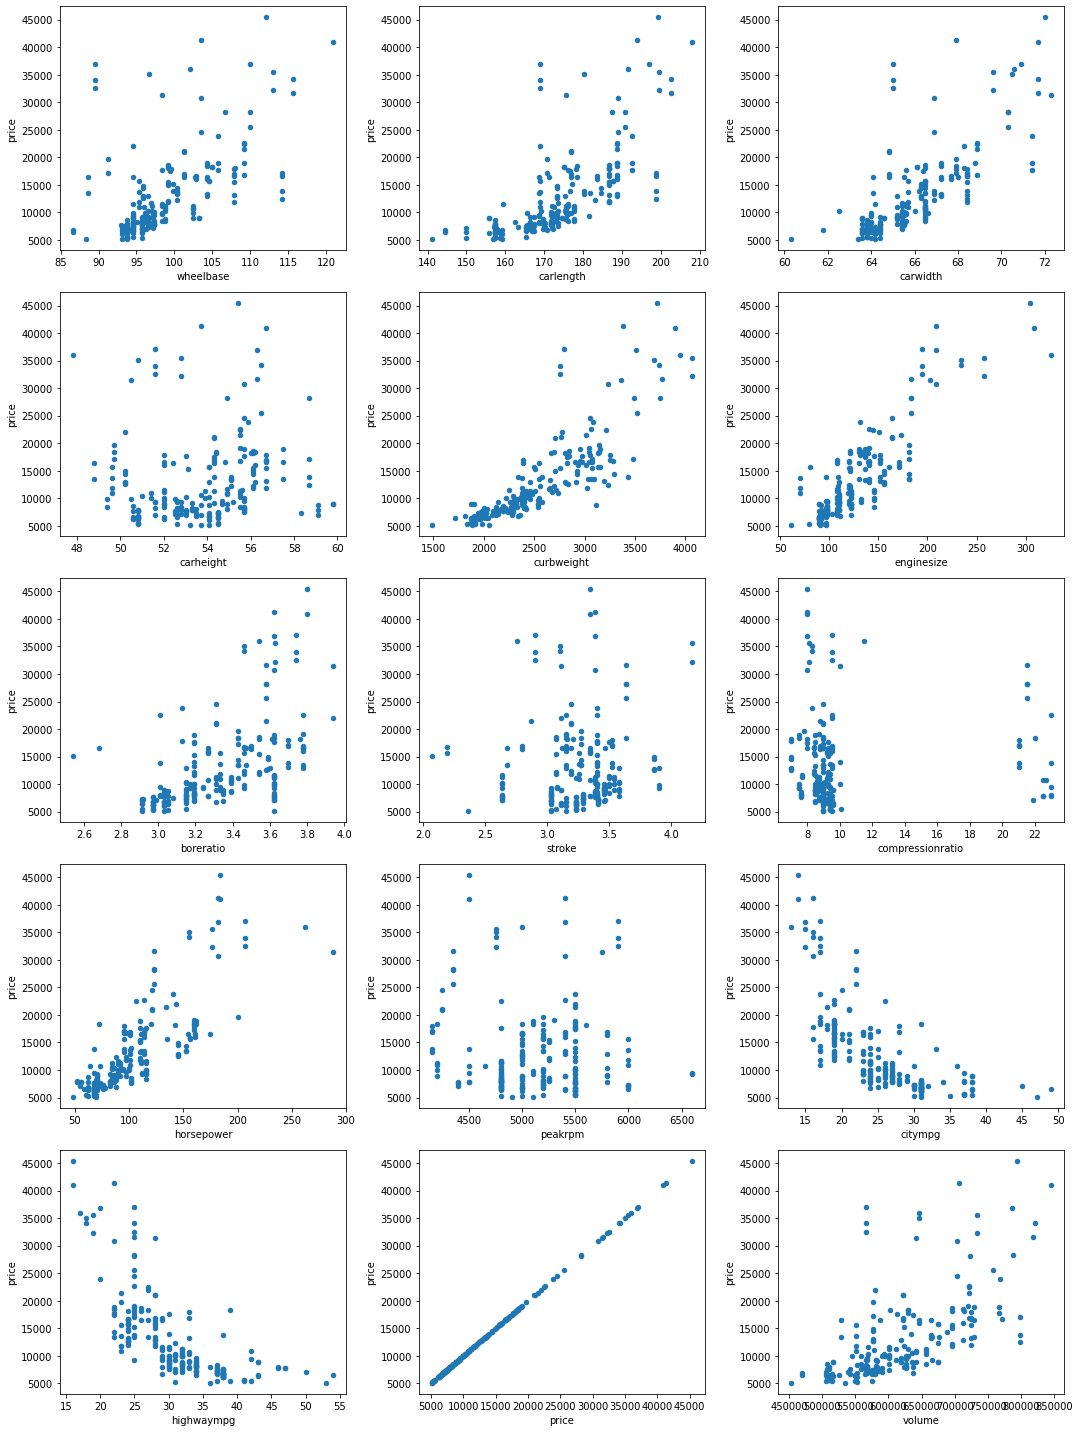

In [16]:
#charts
fig, axes = plt.subplots(5, 3, figsize=(15,20))
for idx, feature in enumerate(numCol_df.columns):
    numCol_df.plot(feature, "price", subplots=True,kind="scatter",ax=axes[idx // 3,idx % 3])
#fig.delaxes(axes[4][1])
#fig.delaxes(axes[4][2])
fig.tight_layout()
plt.show()

<b>Observations from graph:</b>
- Postitive linear relations:<br/>
    - Curbweight,enginesize,horsepower,carwidth,carlength have a linear relationship with dependant variable.<br/>
- Negative linear relationship:<br/>
    - Citympg,Highwaympg have Negative relationship with price <br/>
    
- Carheight,compressionratio,stroke do not have significant correlation with price

- So,We can say that using linear regression model make sense as there are many features having linear relationship with dependant variable


## Visualizing Categorical variables

In [17]:
#function to display bar values
def displayBarValues(chartName,ty=""):
    for p in chartName.patches:
        bar_height = p.get_height() if not pd.isnull(p.get_height()) else 0
        bar_width = p.get_width() if not pd.isnull(p.get_width()) else 0
        bar_x = p.get_x() if not pd.isnull(p.get_x()) else 0
        if(ty=="per"):
            chartName.text(bar_x + (bar_width / 2.0),
                bar_height +0.9,(str)(round(bar_height,1))+"%" or '', color='black', ha="center")
        else:
            chartName.text(bar_x + (bar_width / 2.0),
                bar_height +0.9,(round(bar_height,1)) or '', color='black', ha="center")
       # hideLinesForBar(chartName)
        
def hideLinesForBar(chartname):
    chartname.spines['top'].set_visible(False)
    chartname.spines['right'].set_visible(False)

In [18]:
#Extract list of categorical variables
categoricalcol=cardf.select_dtypes(include=["object"]).columns.tolist()
cateCol_df=cardf[categoricalcol]
cateCol_df.head(2)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,company,price_range
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,medium
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,medium


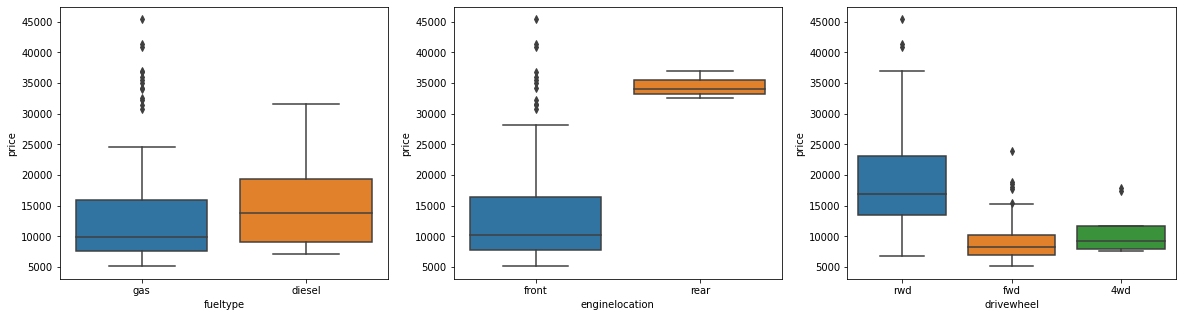

In [19]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cardf)
plt.subplot(1,3,2)
sns.boxplot(x = 'enginelocation', y = 'price', data = cardf)
plt.subplot(1,3,3)
sns.boxplot(x = 'drivewheel', y = 'price', data = cardf)
#a=sns.barplot(x = 'company', y = 'price', data = cardf.sort_values(by="price"))
#a.tick_params(labelrotation=90)

fig.tight_layout()
plt.show()

<b> observations from graph :</b>
    - price is much higher if engine location is rear
    - rwd type of driving wheels seems to have higher price than others
    - also price is higher for disel type cars but not much
    - outliers are present in the data
    - clrearly this are important features for our analysis

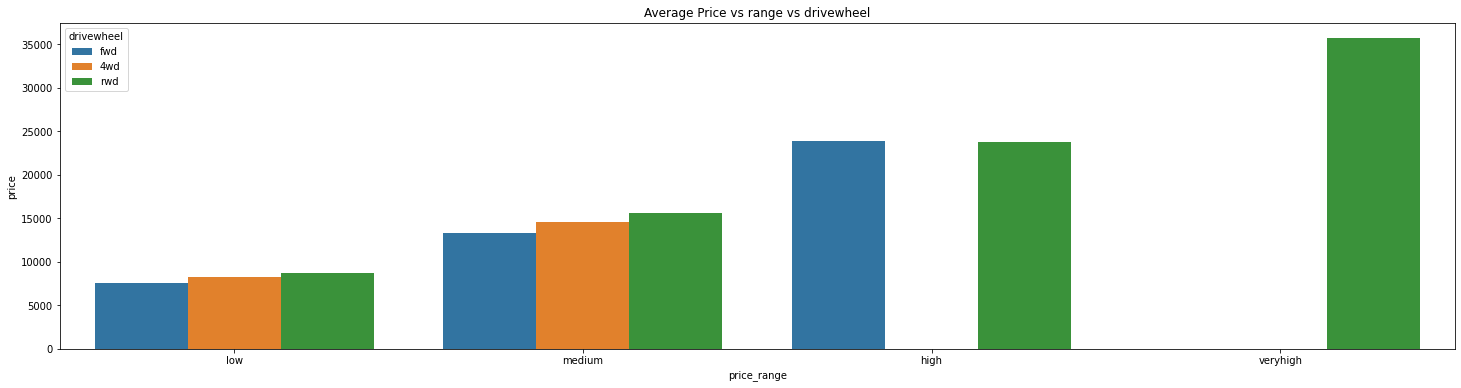

In [20]:
plt.figure(figsize=(25, 6))
data=cardf.groupby(['price_range','drivewheel']).mean().reset_index()
sns.barplot(x = 'price_range', y = 'price', hue="drivewheel", data = data.sort_values(by="price"))
plt.title('Average Price vs range vs drivewheel')
plt.show()

 - Very high and high range cars only preffer rwd  and  fwd type of wheel only.
 - so we can say drivewheel type is having significant effect on pricing.

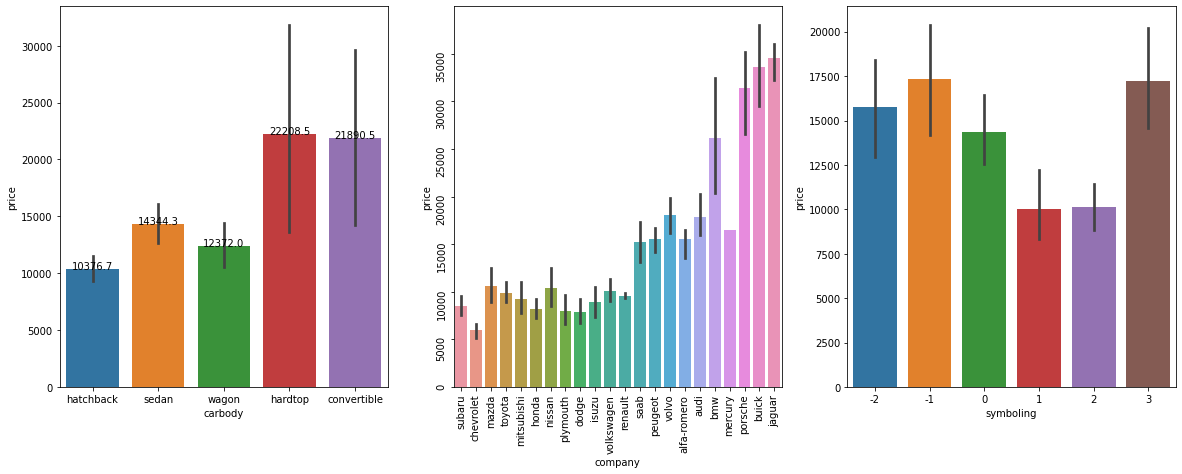

In [21]:
plt.figure(figsize=(20, 7))
plt.subplot(1,3,1)
symbchart=sns.barplot(x = 'carbody', y = 'price', data = cardf.sort_values(by="price"))
displayBarValues(symbchart)
plt.subplot(1,3,2)
compchart=sns.barplot(x = 'company', y = 'price', data = cardf.sort_values(by="price"))
compchart.tick_params(labelrotation=90)
plt.subplot(1,3,3)
symchart=sns.barplot(x = 'symboling', y = 'price', data = cardf.sort_values(by="price"))
#a=sns.barplot(x = 'company', y = 'price', data = cardf.sort_values(by="price"))
fig.tight_layout()
plt.show()

<b> observations from graph :</b>
    - Price is much higher for convertible and hardtop type of carbody
    - Also brandname/company name seems to have effect on car price
    - avg price is low for symboling value 1 and 2

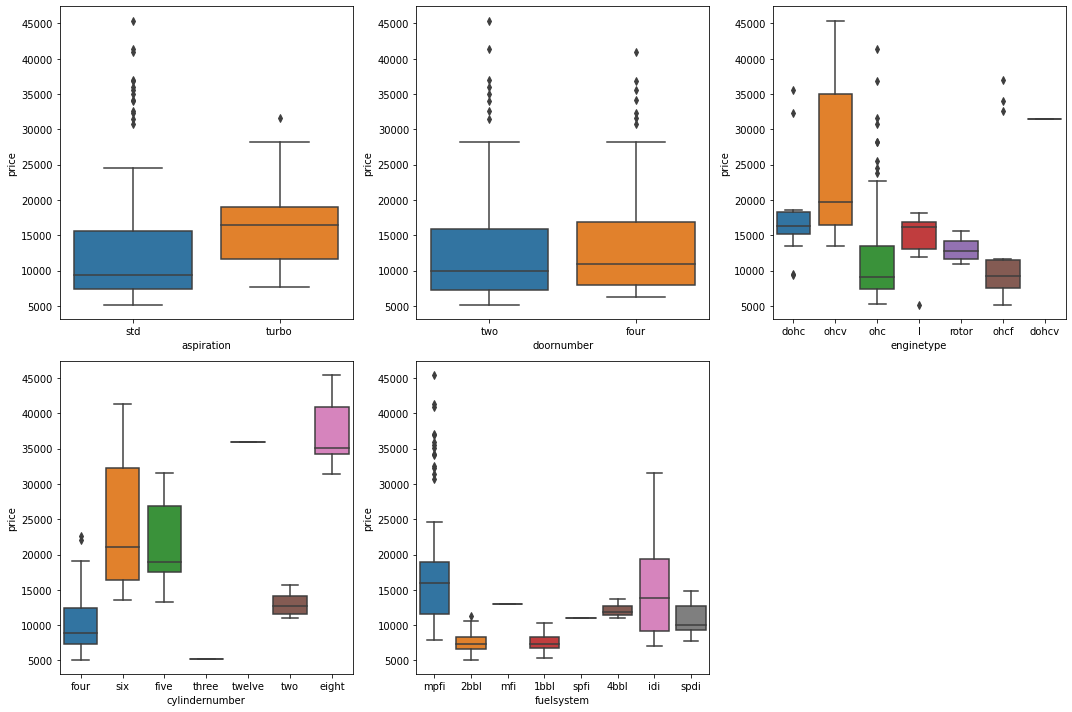

In [22]:
#we will analyze remaing categorical variables
#Extract list of categorical variables
y_val=cardf["price"]
remainingcatcol=['aspiration', 'doornumber','enginetype', 'cylindernumber', 'fuelsystem']
data=cardf[remainingcatcol]

fig, axes = plt.subplots(2, 3, figsize=(15,10))
for idx, feature in enumerate(data.columns):
    sns.boxplot(x =feature, y = y_val, data = data ,ax=axes[idx // 3,idx % 3])
fig.delaxes(axes[1][2])
fig.tight_layout()
plt.show()

<b> observations from graph :</b>
   - aspiration is related with price as mean value for turbo is high though there is overlapping.
   - cylinder number and fuelsystem also shows the variation with price.
   - so we will use this features for our further analysis.

(15.5, -0.5)

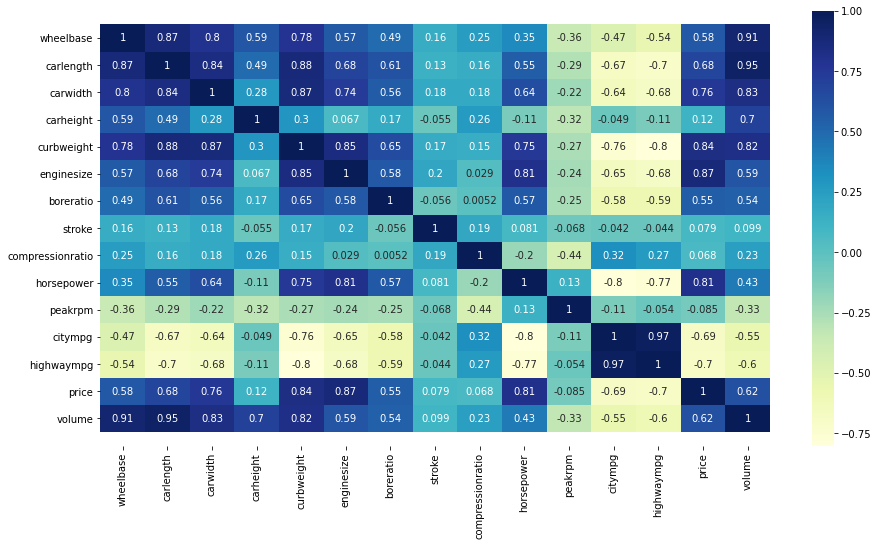

In [23]:
#Check for the correlation between variables
plt.figure(figsize=(15,8))
corre=cardf.corr()
ax=sns.heatmap(corre,annot=True,cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)  

<b>Observations from  correlation Heatmap</b>
- Strong positive correlation with "Price":
        -curbweight,enginesize,horsepower,carwidth,carlength,wheelbase
- Strong negative correlation with "Price":
        -citympg,highwaympg is having High negative correlation.
- Some Independant variables also have strong relationship among themselves i.e
        -highwaympg and citympg have 0.97 correlation which is very high
        -Wheelbase,carlength,carwidth also have strong correlation.
- As variables have strong correlation among themselves we will have to take care of multicollinearity  while building model.

In [24]:
# we will drop this features and will use newly created feature volume of car (length*height*volume)
dropfeatures=['carheight','carlength','carwidth']
cardf.drop(dropfeatures,axis=1,inplace=True)
cardf.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company,price_range,volume
0,3,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,medium,528019.904
1,3,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,medium,528019.904
2,1,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,medium,587592.640
3,2,gas,std,four,sedan,fwd,front,99.8,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,medium,634816.956
4,2,gas,std,four,sedan,4wd,front,99.4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,medium,636734.832


## Categorical variable encoding

We will encode categorical variables.


In [25]:
#check list of categorical columns from previously created df for categorical columns
numericalcol=cardf.select_dtypes(include=np.number).columns.tolist()
categoricalcol=cardf.select_dtypes(include=["object"]).columns.tolist()
cateCol_df=cardf[categoricalcol]
#we will not use derived variable price range for model building as we have dependant variable price already
cateCol_df.drop("price_range",axis=1,inplace=True)
cateCol_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [26]:
#get dummy variables for all categorical columns
dummy_var_df=pd.get_dummies(cateCol_df,drop_first=True)
dummy_var_df.head(2)

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
#Now we will delete original categorical columns and will use dummy columns
cardf.drop(categoricalcol,inplace = True,axis=1)

In [28]:
# will join dummy variables with main dataset
cardf=pd.concat([cardf,dummy_var_df],axis=1)
cardf.head()

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,volume,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
0,88.6,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,528019.904,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,88.6,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,528019.904,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,94.5,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,587592.640,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,99.8,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,634816.956,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,99.4,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,636734.832,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

we will split given data into train dataset(70%) and Test data set(30%)

In [29]:
np.random.seed(0)
cardf_train,cardf_test= train_test_split(cardf,train_size=0.7,random_state=100)

In [30]:
print("Training dataset shape: ", cardf_train.shape)
print("Test dataset shape :", cardf_test.shape)

Training dataset shape:  (143, 67)
Test dataset shape : (62, 67)


In [31]:
cardf_train.head(2)

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,volume,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
122,93.7,2191,98,2.97,3.23,9.4,68,5500,31,38,7609.0,542225.992,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,94.5,2778,151,3.94,3.11,9.5,143,5500,19,27,22018.0,579100.674,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## Scaling of features on Train Dataset

- We can see price,carlength and other variables are having different range so we will perform min-max scaling(values in 0-1 range ) on this data.
- Also there are outliers in data and min_max scaling take care of outliers as it use value 1 for outliers
- we will scale numerical variables only as we already have categorical variables having value in 0&1

In [32]:
#as we already have numerical variabl list extracted before encoding categorical variables we will use the same
print(numericalcol)

['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'volume']


In [33]:
scaler=MinMaxScaler()
cardf_train[numericalcol]=scaler.fit_transform(cardf_train[numericalcol])

In [34]:
#Now we can see that every variable have min value as 0 and max value as 1 on train dataset
cardf_train.describe()

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,volume,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310,0.437947,0.090909,0.349650,0.300699,0.118881,0.125874,0.909091,0.181818,0.440559,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.090909,0.0,0.062937,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.205581,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682,0.216789,0.288490,0.478536,0.460174,0.324786,0.332873,0.288490,0.387050,0.498199,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.288490,0.0,0.243703,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298,0.280120,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00

- After scaling we have every value betwwen 0-1
- Also min max scaling takes care of outliers as it convert outliers into 1

# Model Building and feature selections

- we will first build model using all the values and then will use RFE and manual approach both to reduce the features and build model again (Top -bottom approach)

In [35]:
y_train =cardf_train.pop("price")
X_train=cardf_train

### we will use RFE and Manual tuning both for feature selections

In [36]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [37]:
#Use RFE to select top 15 features then we will use manual method to elliminate further
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [38]:
#List of columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['curbweight', 'enginesize', 'boreratio', 'stroke', 'horsepower',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'company_bmw', 'company_porsche',
       'company_volvo'],
      dtype='object')

#### Build model using RFE selected values

In [39]:
# we will check for statistics and then will remove values manually if necessary
X_train_rfe=X_train[col]
#adding constant to  independant variables
X_train_rfe=sm.add_constant(X_train_rfe)

In [40]:
lm=sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     126.4
Date:                Sun, 30 May 2021   Prob (F-statistic):           1.00e-67
Time:                        11:36:18   Log-Likelihood:                 209.72
No. Observations:                 143   AIC:                            -389.4
Df Residuals:                     128   BIC:                            -345.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.24

- In this model we do not have any variable having p value >0.05 
- We will check VIF of all variables in this model.To verify multicollinearity.


In [41]:
#Function to check VIF after each model
def checkVIF(dataset):
    dataset.drop("const",axis=1,inplace=True)
    vif = pd.DataFrame()
    X = dataset
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [42]:
checkVIF(X_train_rfe)

,Features,VIF
6,enginetype_rotor,inf
11,cylindernumber_two,inf
1,enginesize,74.80
2,boreratio,36.38
0,curbweight,35.21
3,stroke,31.35
8,cylindernumber_four,24.39
4,horsepower,13.62
10,cylindernumber_twelve,2.81
7,cylindernumber_five,2.21


- Veriables are showing inf value for VIF because these veriables can completely explained by other variables.
- So to remove Multicollinearity we will drop variables one at a time and will check again.

In [43]:
X_train_rfe.drop("enginetype_rotor",axis=1,inplace=True)

In [44]:
#building model again
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     126.4
Date:                Sun, 30 May 2021   Prob (F-statistic):           1.00e-67
Time:                        11:36:18   Log-Likelihood:                 209.72
No. Observations:                 143   AIC:                            -389.4
Df Residuals:                     128   BIC:                            -345.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.24

- As no variable having p value >0.05 so we will again check for VIF of variables in model

In [45]:
checkVIF(X_train_rfe)

,Features,VIF
1,enginesize,74.80
2,boreratio,36.38
0,curbweight,35.21
3,stroke,31.35
7,cylindernumber_four,24.39
4,horsepower,13.62
10,cylindernumber_two,3.81
9,cylindernumber_twelve,2.81
6,cylindernumber_five,2.21
12,company_porsche,2.16


- we will drop curbweight as it is less important from business prospective also its VIF is high and again build model

In [46]:
X_train_rfe.drop("curbweight",axis=1,inplace=True)

In [47]:
# add constant and build model again
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     110.3
Date:                Sun, 30 May 2021   Prob (F-statistic):           3.43e-63
Time:                        11:36:18   Log-Likelihood:                 195.30
No. Observations:                 143   AIC:                            -362.6
Df Residuals:                     129   BIC:                            -321.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.25

 - We have enginelocation_rear having p value > 0.005 and we will drop this variable

In [48]:
X_train_rfe.drop("enginelocation_rear",axis=1,inplace=True)

In [49]:
#build model again
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     117.4
Date:                Sun, 30 May 2021   Prob (F-statistic):           1.35e-63
Time:                        11:36:18   Log-Likelihood:                 193.65
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     130   BIC:                            -322.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.24

- As no variable having p value >0.05 so we will again check for VIF of variables in model

In [50]:
checkVIF(X_train_rfe)

,Features,VIF
0,enginesize,51.96
1,boreratio,35.74
2,stroke,30.73
5,cylindernumber_four,23.63
3,horsepower,13.03
8,cylindernumber_two,3.47
7,cylindernumber_twelve,2.47
4,cylindernumber_five,1.95
10,company_porsche,1.50
6,cylindernumber_three,1.24


In [51]:
# We will drop variable having High VIF and less important from Business prospective
X_train_rfe.drop("boreratio",axis=1,inplace=True)

In [52]:
#build model again
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     99.36
Date:                Sun, 30 May 2021   Prob (F-statistic):           5.63e-58
Time:                        11:36:18   Log-Likelihood:                 176.72
No. Observations:                 143   AIC:                            -329.4
Df Residuals:                     131   BIC:                            -293.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [53]:
#drop variable having p value >0.05
X_train_rfe.drop("horsepower",axis=1,inplace=True)

In [54]:
#build model again
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     108.2
Date:                Sun, 30 May 2021   Prob (F-statistic):           1.45e-58
Time:                        11:36:18   Log-Likelihood:                 175.61
No. Observations:                 143   AIC:                            -329.2
Df Residuals:                     132   BIC:                            -296.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.13

-As no variable having p value >0.05 so we will again check for VIF of variables in model

In [55]:
checkVIF(X_train_rfe)

,Features,VIF
1,stroke,14.84
0,enginesize,8.01
3,cylindernumber_four,5.10
5,cylindernumber_twelve,1.49
2,cylindernumber_five,1.43
6,cylindernumber_two,1.32
7,company_bmw,1.20
8,company_porsche,1.16
9,company_volvo,1.10
4,cylindernumber_three,1.06


In [56]:
#drop variable having VIF>10
X_train_rfe.drop("stroke",axis=1,inplace=True)

In [57]:
#build model again
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     116.2
Date:                Sun, 30 May 2021   Prob (F-statistic):           1.47e-58
Time:                        11:36:19   Log-Likelihood:                 172.96
No. Observations:                 143   AIC:                            -325.9
Df Residuals:                     133   BIC:                            -296.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

In [58]:
#Drop variable having p value > 0.05 and build model again
X_train_rfe.drop("cylindernumber_four",axis=1,inplace=True)

In [59]:
#build model again
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     128.8
Date:                Sun, 30 May 2021   Prob (F-statistic):           4.61e-59
Time:                        11:36:19   Log-Likelihood:                 171.55
No. Observations:                 143   AIC:                            -325.1
Df Residuals:                     134   BIC:                            -298.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [60]:
#Drop variable having p value > 0.05 and build model again
X_train_rfe.drop("cylindernumber_three",axis=1,inplace=True)
#build model again
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     146.3
Date:                Sun, 30 May 2021   Prob (F-statistic):           8.19e-60
Time:                        11:36:19   Log-Likelihood:                 170.69
No. Observations:                 143   AIC:                            -325.4
Df Residuals:                     135   BIC:                            -301.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [61]:
checkVIF(X_train_rfe)

,Features,VIF
0,enginesize,1.58
1,cylindernumber_five,1.14
4,company_bmw,1.14
2,cylindernumber_twelve,1.13
5,company_porsche,1.08
6,company_volvo,1.08
3,cylindernumber_two,1.00


- NO variable have VIF value is grater than 5 
- Also model do not have any variable having P-Value is >0.05 
- Our model is explaining 88% of variation on train data set using 7 variables
- We will check for assumptions made earlier about the error terms

In [62]:
#add constant
X_train_rfe= sm.add_constant(X_train_rfe)

# Residual Analysis On Train Data
We will check for the below assumptions made while building linear model-
    - error terms are normally distributed
    - errors are independantof each other

In [63]:
y_train_pred=lm.predict(X_train_rfe)

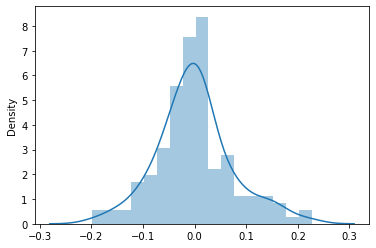

In [64]:
residuals= y_train-y_train_pred
sns.distplot(residuals)
plt.show()

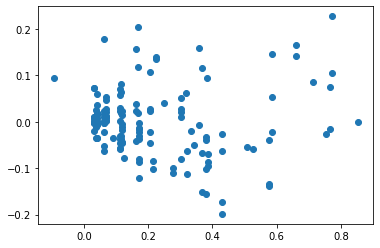

In [65]:
#Looking for patterns

plt.scatter(y_train_pred ,residuals)
plt.show()

# Making Predictions

In [66]:
print(numericalcol)

['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'volume']


In [67]:
# we will scale the values of test dataset first

cardf_test[numericalcol] = scaler.transform(cardf_test[numericalcol])

divide test data into x and y

In [68]:
y_test = cardf_test.pop('price')
X_test = cardf_test

We will only use predicators and will drop remaining variables

In [69]:
# Column names of final model except constant
colNamesFinal=X_train_rfe.drop("const",axis=1).columns
X_test_new= X_test[colNamesFinal]
#add constant
X_test_new= sm.add_constant(X_test_new)

In [70]:
y_pred_test=lm.predict(X_test_new)

# Model Evaluation

In [71]:
from sklearn.metrics import mean_squared_error, r2_score
import math

#RootMeanSquaredError

RMSE_train= mean_squared_error(y_train, y_train_pred)
RMSE_test= mean_squared_error(y_test, y_pred_test)

#r2
r_squared_train=r2_score(y_train,y_train_pred)
r_squared_test = r2_score(y_test, y_pred_test)

#Adj-R2
adj_r_squared_train = 1 - ((1-r_squared_train)*(len(y_train)-1)/(len(y_train)-len(X_train_rfe.columns)-1))
adj_r_squared_test = 1 - ((1-r_squared_test)*(len(y_test)-1)/(len(y_test)-len(X_test_new.columns)-1))

print("RMSE for TRAIN  DATA is : ",round(math.sqrt(RMSE_train),4))
print("RMSE for TEST DATA is : ",round(math.sqrt(RMSE_test),4))

print("\n")

print("R2 for TRAIN  DATA is : ",round(r_squared_train,4))
print("R2 for TEST DATA is : ",round(r_squared_test,4))
print("\n")

print("Adjusted R2 for TRAIN DATA is : ",round(adj_r_squared_train,4))
print("Adjusted R2 for TEST DATA is : ",round(adj_r_squared_test,4))

RMSE for TRAIN  DATA is :  0.0733
RMSE for TEST DATA is :  0.0823


R2 for TRAIN  DATA is :  0.8835
R2 for TEST DATA is :  0.8733


Adjusted R2 for TRAIN DATA is :  0.8766
Adjusted R2 for TEST DATA is :  0.8542


### Visualizing predictions
- ploting graph of Actual price values VS Predicted Price values  for Test Data
- plotting Y_test VS Y_pred to check spread of data

Text(0.5, 0, 'Index')

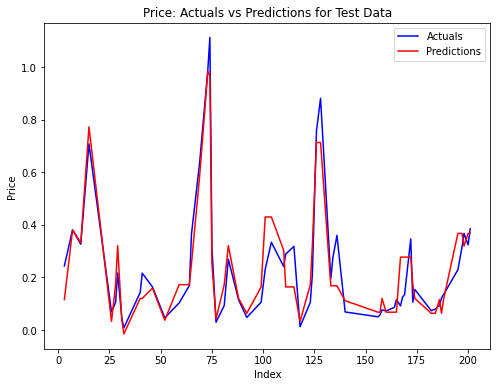

In [72]:
#actual vs predicted price on TEST DATA
fig, ax=plt.subplots(figsize=(8,6))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_test.index,y=y_pred_test,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions for Test Data')
ax.set_ylabel('Price')
ax.set_xlabel('Index')

Text(0, 0.5, 'y_pred_test')

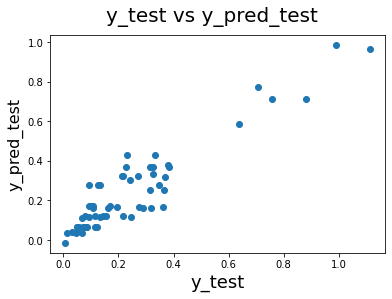

In [73]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_test', fontsize=16)  

<b>Conslusions:</b>
    - Our Model is able to explain approx 88% of variance on Test data and 87% on Train data
    - R2 on Train Dataset is : 0.883 and R2 on Test dataset is :0.873
    - No variables in the model have pvalue >0.05.
    - No variable have VIF > 5
    - prob(F-statistics) is also very low.
    - so we can conclude that our MODEL IS SIGNIFICANT.